# 项目介绍

## 项目人：潘丽璇

* 项目时间：6月28日-7月3日


## 数据来源

* 和鲸社区：选用boss直聘网站的数据分析职位的招聘数据  

-----

## 数据源介绍

* 项目主要使用“job.csv”文件作为数据源，其中数据文件的主要栏位有职位、城市、公司、薪资、学历、工作经验、行业标签。  


> 其中本项目所使用的可计算的栏位为最低薪资、最高薪资、平均薪资、奖金率。

>本项目所使用的可分类的栏位为职位、城市、学历、工作经验、行业标签。  

## 数据分析目标

![目标](img/数据分析目标.png)

[数据分析目标](http://naotu.baidu.com/file/879df08193b02242e219c71829a020ed?token=acf51578fe1a1994)


## 数据分析结果价值宣言

### 数据分析的优势
* 及时性高、可信度高、相关性强、安全性高

### 数据分析行业的就业前景
* 随着互联网和大数据的发展，数据分析市场需求大。
* 高于行业平均水平的薪资。
* 发展前景和选择性非常广。


### 本人研究数据分析行业的就业前景的原因
* 这学期开始接触数据分析，我对这个行业也慢慢从一开始“抵触复杂的代码”产生的害怕抗拒心理，转变成如今对数据分析有了兴趣，并且有以后从事这方面的兴趣和想法。看到一个又一个bug被自己解决的成就感，以及看到自己做出来的数据分析成果的满足感，还有通过数据分析，我对数据有了更深的理解。
* 我想了解数据分析行业的职位、薪资以及在各大城市的招聘情况是如何的，为以后作准备。

# 数据准备

In [1]:
# 模块准备
import pandas as pd
import numpy as np
import warnings 
import matplotlib.pyplot as plt
import re
import cufflinks as cf
import plotly as py
import plotly.graph_objs as go
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from scipy.stats import norm,mode
warnings.filterwarnings('ignore')
cf.set_config_file(offline=True)
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False


In [2]:
# # 读取数据
# df = pd.read_csv ("job.csv", encoding = "utf8", sep="\t")
# df.info()


# 数据清洗

## 导入数据

In [3]:
#由于原数据没有列名，所以设置列名
df = pd.read_csv('job.csv',header=None,names=['职位','城市','公司','薪资','学历','工作经验','行业标签'])
df

,职位,城市,公司,薪资,学历,工作经验,行业标签
0,数据分析,北京·朝阳区·亚运村,中信百信银行,25-40K·15薪,本科,5-10年,银行
1,数据分析,北京·朝阳区·太阳宫,BOSS直聘,25-40K·16薪,博士,1-3年,人力资源服务
2,数据分析,北京·朝阳区·鸟巢,京东集团,50-80K·14薪,本科,3-5年,电子商务
3,数据分析,北京·海淀区·清河,一亩田,15-25K,本科,3-5年,O2O
4,数据分析岗,北京·海淀区·西北旺,建信金科,20-40K·14薪,硕士,5-10年,银行
...,...,...,...,...,...,...,...
3040,助理数据分析员,南京·建邺区·雨润大街,万得,4-6K,本科,经验不限,数据服务
3041,数据分析师（经济）,南京·建邺区·奥体,万得,4-6K,本科,经验不限,数据服务
3042,（金融）数据分析员,南京·建邺区·奥体,万得,4-6K,本科,经验不限,数据服务
3043,数据分析员,南京·建邺区·奥体,万得,4-6K,本科,1年以内,数据服务


## 查看数据整体情况

In [4]:
df.head()

,职位,城市,公司,薪资,学历,工作经验,行业标签
0,数据分析,北京·朝阳区·亚运村,中信百信银行,25-40K·15薪,本科,5-10年,银行
1,数据分析,北京·朝阳区·太阳宫,BOSS直聘,25-40K·16薪,博士,1-3年,人力资源服务
2,数据分析,北京·朝阳区·鸟巢,京东集团,50-80K·14薪,本科,3-5年,电子商务
3,数据分析,北京·海淀区·清河,一亩田,15-25K,本科,3-5年,O2O
4,数据分析岗,北京·海淀区·西北旺,建信金科,20-40K·14薪,硕士,5-10年,银行


In [5]:
df.shape

(3045, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3045 entries, 0 to 3044
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   职位      3045 non-null   object
 1   城市      3045 non-null   object
 2   公司      3045 non-null   object
 3   薪资      3045 non-null   object
 4   学历      3045 non-null   object
 5   工作经验    3045 non-null   object
 6   行业标签    3045 non-null   object
dtypes: object(7)
memory usage: 166.6+ KB


### 清洗重复数据

In [7]:
#查找有无重复数据
df.duplicated().sum()

45

In [8]:
df.drop_duplicates(keep='first',inplace=True)

* 当keep=False时，就是去掉所有的重复行 
* 当keep=‘first'时，就是保留第一次出现的重复行 
* 当keep='last'时就是保留最后一次出现的重复行
>参考数据：[pandas DataFrame 删除重复的行的实现方法](https://www.jb51.net/article/155577.htm)

In [9]:
#检查还有没有重复的数据
df.duplicated().sum()

0

In [10]:
df.shape

(3000, 7)

### 清洗缺失数据

In [11]:
# 检查每列是否有缺失值以及缺失值的数量
df.isnull().sum()

职位      0
城市      0
公司      0
薪资      0
学历      0
工作经验    0
行业标签    0
dtype: int64

In [12]:
df

,职位,城市,公司,薪资,学历,工作经验,行业标签
0,数据分析,北京·朝阳区·亚运村,中信百信银行,25-40K·15薪,本科,5-10年,银行
1,数据分析,北京·朝阳区·太阳宫,BOSS直聘,25-40K·16薪,博士,1-3年,人力资源服务
2,数据分析,北京·朝阳区·鸟巢,京东集团,50-80K·14薪,本科,3-5年,电子商务
3,数据分析,北京·海淀区·清河,一亩田,15-25K,本科,3-5年,O2O
4,数据分析岗,北京·海淀区·西北旺,建信金科,20-40K·14薪,硕士,5-10年,银行
...,...,...,...,...,...,...,...
3040,助理数据分析员,南京·建邺区·雨润大街,万得,4-6K,本科,经验不限,数据服务
3041,数据分析师（经济）,南京·建邺区·奥体,万得,4-6K,本科,经验不限,数据服务
3042,（金融）数据分析员,南京·建邺区·奥体,万得,4-6K,本科,经验不限,数据服务
3043,数据分析员,南京·建邺区·奥体,万得,4-6K,本科,1年以内,数据服务


## 清洗职位数据

**考虑到数据中有实习岗位，实习岗薪资按天算，不具有太大的参考价值，故删除包含实习的数据**

In [13]:
shixi=df['职位'].str.contains('实习')
df=df[~shixi]
df.reset_index(drop=True,inplace=True)
df

,职位,城市,公司,薪资,学历,工作经验,行业标签
0,数据分析,北京·朝阳区·亚运村,中信百信银行,25-40K·15薪,本科,5-10年,银行
1,数据分析,北京·朝阳区·太阳宫,BOSS直聘,25-40K·16薪,博士,1-3年,人力资源服务
2,数据分析,北京·朝阳区·鸟巢,京东集团,50-80K·14薪,本科,3-5年,电子商务
3,数据分析,北京·海淀区·清河,一亩田,15-25K,本科,3-5年,O2O
4,数据分析岗,北京·海淀区·西北旺,建信金科,20-40K·14薪,硕士,5-10年,银行
...,...,...,...,...,...,...,...
2921,助理数据分析员,南京·建邺区·雨润大街,万得,4-6K,本科,经验不限,数据服务
2922,数据分析师（经济）,南京·建邺区·奥体,万得,4-6K,本科,经验不限,数据服务
2923,（金融）数据分析员,南京·建邺区·奥体,万得,4-6K,本科,经验不限,数据服务
2924,数据分析员,南京·建邺区·奥体,万得,4-6K,本科,1年以内,数据服务


## 清洗城市数据

**城市列包含的值太杂，且本项目分析不需要用到详细地址。鉴于城市数据不规范，所以进行处理，全部转换为城市名。**

In [83]:
df['城市']=df['城市'].str[:2]
df

,职位,城市,公司,薪资,最低薪资,最高薪资,奖金率,平均薪资,学历,工作经验,行业标签
0,数据分析,北京,中信百信银行,25-40K·15薪,25,40,1.250000,40,本科,5-10年,银行
1,数据分析,北京,BOSS直聘,25-40K·16薪,25,40,1.333333,43,博士,1-3年,其他行业
3,数据分析,北京,一亩田,15-25K,15,25,1.000000,20,本科,3-5年,O2O
4,数据分析岗,北京,建信金科,20-40K·14薪,20,40,1.166667,35,硕士,5-10年,银行
5,数据分析,北京,北京新氧万维,15-30K·14薪,15,30,1.166667,26,本科,1-3年,互联网
...,...,...,...,...,...,...,...,...,...,...,...
2921,助理数据分析员,南京,万得,4-6K,4,6,1.000000,5,本科,经验不限,数据服务
2922,数据分析师（经济）,南京,万得,4-6K,4,6,1.000000,5,本科,经验不限,数据服务
2923,（金融）数据分析员,南京,万得,4-6K,4,6,1.000000,5,本科,经验不限,数据服务
2924,数据分析员,南京,万得,4-6K,4,6,1.000000,5,本科,1年以内,数据服务


In [84]:
#检查城市有无错误和不规范
df['城市'].unique()

array(['北京', '上海', '广州', '深圳', '杭州', '天津', '苏州', '武汉', '厦门', '长沙', '成都',
       '郑州', '重庆', '青岛', '南京'], dtype=object)

## 清洗薪资数据

In [85]:
df['薪资'].unique()

array(['25-40K·15薪', '25-40K·16薪', '15-25K', '20-40K·14薪', '15-30K·14薪',
       '20-30K', '15-25K·14薪', '40-55K·13薪', '20-35K', '30-55K·13薪',
       '20-40K·16薪', '35-40K·15薪', '15-30K', '25-50K·14薪', '25-35K·14薪',
       '15-25K·16薪', '15-28K·14薪', '18-28K', '30-50K·13薪', '20-35K·14薪',
       '15-28K', '20-30K·13薪', '30-50K·16薪', '18-30K·14薪', '18-22K·15薪',
       '25-45K·16薪', '13-25K', '14-25K·14薪', '18-35K·14薪', '25-45K·14薪',
       '25-40K', '15-26K·13薪', '12-24K', '25-45K', '20-40K', '20-30K·15薪',
       '15-25K·15薪', '25-40K·17薪', '20-30K·14薪', '18-35K', '18-27K',
       '30-45K', '20-40K·15薪', '20-30K·16薪', '25-30K·15薪', '17-27K',
       '28-50K·14薪', '25-35K', '30-60K·14薪', '30-55K', '15-22K', '30-50K',
       '30-50K·14薪', '30-60K·13薪', '25-50K·15薪', '13-26K·16薪', '25-50K',
       '12-24K·14薪', '17-25K·15薪', '18-25K·15薪', '28-40K·16薪', '30-40K',
       '28-40K·13薪', '20-25K·16薪', '25-30K·14薪', '15-30K·15薪',
       '25-40K·14薪', '30-45K·14薪', '20-35K·16薪', '15-30K·16薪', '25-26

**1. 将薪资列的值进行拆分，新增最低薪资，最高薪资两列，作为一个岗位薪资的最低值和最高值。**

In [86]:
# df['最低薪资']=df['薪资'].str.extract('^(\d+).*')+'k'
df['最低薪资']=df['薪资'].str.extract('^(\d+).*')

In [87]:
# df['最高薪资']=df['薪资'].str.extract('^.*?-(\d+).*')+'k'
df['最高薪资']=df['薪资'].str.extract('^.*?-(\d+).*')

In [88]:
df

,职位,城市,公司,薪资,最低薪资,最高薪资,奖金率,平均薪资,学历,工作经验,行业标签
0,数据分析,北京,中信百信银行,25-40K·15薪,25,40,1.250000,40,本科,5-10年,银行
1,数据分析,北京,BOSS直聘,25-40K·16薪,25,40,1.333333,43,博士,1-3年,其他行业
3,数据分析,北京,一亩田,15-25K,15,25,1.000000,20,本科,3-5年,O2O
4,数据分析岗,北京,建信金科,20-40K·14薪,20,40,1.166667,35,硕士,5-10年,银行
5,数据分析,北京,北京新氧万维,15-30K·14薪,15,30,1.166667,26,本科,1-3年,互联网
...,...,...,...,...,...,...,...,...,...,...,...
2921,助理数据分析员,南京,万得,4-6K,4,6,1.000000,5,本科,经验不限,数据服务
2922,数据分析师（经济）,南京,万得,4-6K,4,6,1.000000,5,本科,经验不限,数据服务
2923,（金融）数据分析员,南京,万得,4-6K,4,6,1.000000,5,本科,经验不限,数据服务
2924,数据分析员,南京,万得,4-6K,4,6,1.000000,5,本科,1年以内,数据服务


**2. 有些公司的薪资是单个值，则用最低薪资列的值填充最高薪资列。**

In [89]:
df['最高薪资'].fillna(df['最低薪资'],inplace=True)
#传入inplace=True直接修改原对象

In [90]:
df

,职位,城市,公司,薪资,最低薪资,最高薪资,奖金率,平均薪资,学历,工作经验,行业标签
0,数据分析,北京,中信百信银行,25-40K·15薪,25,40,1.250000,40,本科,5-10年,银行
1,数据分析,北京,BOSS直聘,25-40K·16薪,25,40,1.333333,43,博士,1-3年,其他行业
3,数据分析,北京,一亩田,15-25K,15,25,1.000000,20,本科,3-5年,O2O
4,数据分析岗,北京,建信金科,20-40K·14薪,20,40,1.166667,35,硕士,5-10年,银行
5,数据分析,北京,北京新氧万维,15-30K·14薪,15,30,1.166667,26,本科,1-3年,互联网
...,...,...,...,...,...,...,...,...,...,...,...
2921,助理数据分析员,南京,万得,4-6K,4,6,1.000000,5,本科,经验不限,数据服务
2922,数据分析师（经济）,南京,万得,4-6K,4,6,1.000000,5,本科,经验不限,数据服务
2923,（金融）数据分析员,南京,万得,4-6K,4,6,1.000000,5,本科,经验不限,数据服务
2924,数据分析员,南京,万得,4-6K,4,6,1.000000,5,本科,1年以内,数据服务


**3. 有些公司有标明年终奖，如14薪等，故新增一列奖金率，并计算每个岗位的奖金率**

In [91]:
df['奖金率']=df['薪资'].str.extract('^.*?·(\d{2})薪')
df['奖金率'].fillna(12,inplace=True)
# 没有年终奖的要给他们填入空缺值！！！千万严谨呜呜呜呜哭了
df['奖金率']=df['奖金率'].astype('float64')
df['奖金率']=df['奖金率']/12
df

,职位,城市,公司,薪资,最低薪资,最高薪资,奖金率,平均薪资,学历,工作经验,行业标签
0,数据分析,北京,中信百信银行,25-40K·15薪,25,40,1.250000,40,本科,5-10年,银行
1,数据分析,北京,BOSS直聘,25-40K·16薪,25,40,1.333333,43,博士,1-3年,其他行业
3,数据分析,北京,一亩田,15-25K,15,25,1.000000,20,本科,3-5年,O2O
4,数据分析岗,北京,建信金科,20-40K·14薪,20,40,1.166667,35,硕士,5-10年,银行
5,数据分析,北京,北京新氧万维,15-30K·14薪,15,30,1.166667,26,本科,1-3年,互联网
...,...,...,...,...,...,...,...,...,...,...,...
2921,助理数据分析员,南京,万得,4-6K,4,6,1.000000,5,本科,经验不限,数据服务
2922,数据分析师（经济）,南京,万得,4-6K,4,6,1.000000,5,本科,经验不限,数据服务
2923,（金融）数据分析员,南京,万得,4-6K,4,6,1.000000,5,本科,经验不限,数据服务
2924,数据分析员,南京,万得,4-6K,4,6,1.000000,5,本科,1年以内,数据服务


**4. 将最低薪资，最高薪资，奖金率列转换为数值形式，并以此计算出每个岗位的平均薪资作为新增列**

In [92]:
df['最低薪资'] = df['最低薪资'].astype('int64')
df['最高薪资'] = df['最高薪资'].astype('int64')
df['平均薪资'] = (df['最低薪资']+df['最高薪资'])/2*df['奖金率']
df['平均薪资'] = df['平均薪资'].astype('int64')
df

,职位,城市,公司,薪资,最低薪资,最高薪资,奖金率,平均薪资,学历,工作经验,行业标签
0,数据分析,北京,中信百信银行,25-40K·15薪,25,40,1.250000,40,本科,5-10年,银行
1,数据分析,北京,BOSS直聘,25-40K·16薪,25,40,1.333333,43,博士,1-3年,其他行业
3,数据分析,北京,一亩田,15-25K,15,25,1.000000,20,本科,3-5年,O2O
4,数据分析岗,北京,建信金科,20-40K·14薪,20,40,1.166667,35,硕士,5-10年,银行
5,数据分析,北京,北京新氧万维,15-30K·14薪,15,30,1.166667,26,本科,1-3年,互联网
...,...,...,...,...,...,...,...,...,...,...,...
2921,助理数据分析员,南京,万得,4-6K,4,6,1.000000,5,本科,经验不限,数据服务
2922,数据分析师（经济）,南京,万得,4-6K,4,6,1.000000,5,本科,经验不限,数据服务
2923,（金融）数据分析员,南京,万得,4-6K,4,6,1.000000,5,本科,经验不限,数据服务
2924,数据分析员,南京,万得,4-6K,4,6,1.000000,5,本科,1年以内,数据服务


In [93]:
df.head()

,职位,城市,公司,薪资,最低薪资,最高薪资,奖金率,平均薪资,学历,工作经验,行业标签
0,数据分析,北京,中信百信银行,25-40K·15薪,25,40,1.250000,40,本科,5-10年,银行
1,数据分析,北京,BOSS直聘,25-40K·16薪,25,40,1.333333,43,博士,1-3年,其他行业
3,数据分析,北京,一亩田,15-25K,15,25,1.000000,20,本科,3-5年,O2O
4,数据分析岗,北京,建信金科,20-40K·14薪,20,40,1.166667,35,硕士,5-10年,银行
5,数据分析,北京,北京新氧万维,15-30K·14薪,15,30,1.166667,26,本科,1-3年,互联网


In [94]:
#调整顺序
cols=list(df)
cols.insert(4,cols.pop(cols.index('最低薪资')))
cols.insert(5,cols.pop(cols.index('最高薪资')))
cols.insert(6,cols.pop(cols.index('奖金率')))
cols.insert(7,cols.pop(cols.index('平均薪资')))
df=df.loc[:,cols]
df

,职位,城市,公司,薪资,最低薪资,最高薪资,奖金率,平均薪资,学历,工作经验,行业标签
0,数据分析,北京,中信百信银行,25-40K·15薪,25,40,1.250000,40,本科,5-10年,银行
1,数据分析,北京,BOSS直聘,25-40K·16薪,25,40,1.333333,43,博士,1-3年,其他行业
3,数据分析,北京,一亩田,15-25K,15,25,1.000000,20,本科,3-5年,O2O
4,数据分析岗,北京,建信金科,20-40K·14薪,20,40,1.166667,35,硕士,5-10年,银行
5,数据分析,北京,北京新氧万维,15-30K·14薪,15,30,1.166667,26,本科,1-3年,互联网
...,...,...,...,...,...,...,...,...,...,...,...
2921,助理数据分析员,南京,万得,4-6K,4,6,1.000000,5,本科,经验不限,数据服务
2922,数据分析师（经济）,南京,万得,4-6K,4,6,1.000000,5,本科,经验不限,数据服务
2923,（金融）数据分析员,南京,万得,4-6K,4,6,1.000000,5,本科,经验不限,数据服务
2924,数据分析员,南京,万得,4-6K,4,6,1.000000,5,本科,1年以内,数据服务


**5. 再次查看数据，发现极端异常值，月薪1000和月薪10万**


In [95]:
df.describe()

,最低薪资,最高薪资,奖金率,平均薪资
count,2880.000000,2880.000000,2880.000000,2880.000000
mean,11.563889,19.363889,1.055816,16.367014
std,6.853355,12.453186,0.097943,11.077407
min,2.000000,4.000000,1.000000,3.000000
25%,6.000000,9.000000,1.000000,7.000000
50%,10.000000,15.000000,1.000000,13.000000
75%,15.000000,28.000000,1.083333,22.250000
max,40.000000,65.000000,1.666667,53.000000


**6. 这些极端值数量都很少，剔除月薪小于2000大于55000的数据**

In [96]:
df=df[(df.平均薪资>2)&(df.平均薪资<55)]
df

,职位,城市,公司,薪资,最低薪资,最高薪资,奖金率,平均薪资,学历,工作经验,行业标签
0,数据分析,北京,中信百信银行,25-40K·15薪,25,40,1.250000,40,本科,5-10年,银行
1,数据分析,北京,BOSS直聘,25-40K·16薪,25,40,1.333333,43,博士,1-3年,其他行业
3,数据分析,北京,一亩田,15-25K,15,25,1.000000,20,本科,3-5年,O2O
4,数据分析岗,北京,建信金科,20-40K·14薪,20,40,1.166667,35,硕士,5-10年,银行
5,数据分析,北京,北京新氧万维,15-30K·14薪,15,30,1.166667,26,本科,1-3年,互联网
...,...,...,...,...,...,...,...,...,...,...,...
2921,助理数据分析员,南京,万得,4-6K,4,6,1.000000,5,本科,经验不限,数据服务
2922,数据分析师（经济）,南京,万得,4-6K,4,6,1.000000,5,本科,经验不限,数据服务
2923,（金融）数据分析员,南京,万得,4-6K,4,6,1.000000,5,本科,经验不限,数据服务
2924,数据分析员,南京,万得,4-6K,4,6,1.000000,5,本科,1年以内,数据服务


## 查看学历是否需要清洗

In [97]:
df['学历'].unique()

array(['本科', '博士', '硕士', '不限', '大专', '高中', '中技'], dtype=object)

In [98]:
df['学历'].value_counts()

本科    2153
大专     487
硕士     142
不限      74
中技      10
高中       8
博士       6
Name: 学历, dtype: int64

In [99]:
pd.set_option('max_row',100) 
df

,职位,城市,公司,薪资,最低薪资,最高薪资,奖金率,平均薪资,学历,工作经验,行业标签
0,数据分析,北京,中信百信银行,25-40K·15薪,25,40,1.250000,40,本科,5-10年,银行
1,数据分析,北京,BOSS直聘,25-40K·16薪,25,40,1.333333,43,博士,1-3年,其他行业
3,数据分析,北京,一亩田,15-25K,15,25,1.000000,20,本科,3-5年,O2O
4,数据分析岗,北京,建信金科,20-40K·14薪,20,40,1.166667,35,硕士,5-10年,银行
5,数据分析,北京,北京新氧万维,15-30K·14薪,15,30,1.166667,26,本科,1-3年,互联网
...,...,...,...,...,...,...,...,...,...,...,...
2921,助理数据分析员,南京,万得,4-6K,4,6,1.000000,5,本科,经验不限,数据服务
2922,数据分析师（经济）,南京,万得,4-6K,4,6,1.000000,5,本科,经验不限,数据服务
2923,（金融）数据分析员,南京,万得,4-6K,4,6,1.000000,5,本科,经验不限,数据服务
2924,数据分析员,南京,万得,4-6K,4,6,1.000000,5,本科,1年以内,数据服务


## 清洗工作经验数据

In [100]:
df['工作经验'].unique()

array(['5-10年', '1-3年', '3-5年', '经验不限', '在校/应届', '1年以内', '10年以上'],
      dtype=object)

In [101]:
df['工作经验'].replace('5-10年学历','5-10年',inplace=True)
df['工作经验'].replace('3-5年学历','3-5年',inplace=True)
df['工作经验'].replace('经验不限学历','经验不限',inplace=True)
df['工作经验'].replace('1-3年学历','1-3年',inplace=True)
df['工作经验'].replace('1年以内学历','1年以内',inplace=True)
df['工作经验'].replace('经验不限中专/','经验不限',inplace=True)
df['工作经验'].replace('1年以内中专/','1年以内',inplace=True)
df['工作经验'].replace('1-3年中专/','1-3年',inplace=True)
df['工作经验'].unique()

array(['5-10年', '1-3年', '3-5年', '经验不限', '在校/应届', '1年以内', '10年以上'],
      dtype=object)

In [102]:
df

,职位,城市,公司,薪资,最低薪资,最高薪资,奖金率,平均薪资,学历,工作经验,行业标签
0,数据分析,北京,中信百信银行,25-40K·15薪,25,40,1.250000,40,本科,5-10年,银行
1,数据分析,北京,BOSS直聘,25-40K·16薪,25,40,1.333333,43,博士,1-3年,其他行业
3,数据分析,北京,一亩田,15-25K,15,25,1.000000,20,本科,3-5年,O2O
4,数据分析岗,北京,建信金科,20-40K·14薪,20,40,1.166667,35,硕士,5-10年,银行
5,数据分析,北京,北京新氧万维,15-30K·14薪,15,30,1.166667,26,本科,1-3年,互联网
...,...,...,...,...,...,...,...,...,...,...,...
2921,助理数据分析员,南京,万得,4-6K,4,6,1.000000,5,本科,经验不限,数据服务
2922,数据分析师（经济）,南京,万得,4-6K,4,6,1.000000,5,本科,经验不限,数据服务
2923,（金融）数据分析员,南京,万得,4-6K,4,6,1.000000,5,本科,经验不限,数据服务
2924,数据分析员,南京,万得,4-6K,4,6,1.000000,5,本科,1年以内,数据服务


## 清洗行业标签

**1. 观察行业标签列**

In [103]:
df['行业标签'].value_counts()

互联网       729
其他行业      647
计算机软件     285
移动互联网     269
电子商务      247
数据服务      111
互联网金融      87
游戏         80
在线教育       75
生活服务       72
O2O        69
医疗健康       68
贸易/进出口     52
企业服务       46
银行         43
Name: 行业标签, dtype: int64

**2. 对数量较少且为传统行业的数据归入其他行业**

In [104]:
df.loc[~df['行业标签'].isin(['互联网','计算机软件','移动互联网','电子商务','数据服务',
                           '互联网金融','游戏','在线教育','生活服务','O2O','医疗健康','贸易/进出口','企业服务','银行']),'行业标签']='其他行业'

In [105]:
df['行业标签'].value_counts()

互联网       729
其他行业      647
计算机软件     285
移动互联网     269
电子商务      247
数据服务      111
互联网金融      87
游戏         80
在线教育       75
生活服务       72
O2O        69
医疗健康       68
贸易/进出口     52
企业服务       46
银行         43
Name: 行业标签, dtype: int64

In [106]:
new_df=df
new_df

,职位,城市,公司,薪资,最低薪资,最高薪资,奖金率,平均薪资,学历,工作经验,行业标签
0,数据分析,北京,中信百信银行,25-40K·15薪,25,40,1.250000,40,本科,5-10年,银行
1,数据分析,北京,BOSS直聘,25-40K·16薪,25,40,1.333333,43,博士,1-3年,其他行业
3,数据分析,北京,一亩田,15-25K,15,25,1.000000,20,本科,3-5年,O2O
4,数据分析岗,北京,建信金科,20-40K·14薪,20,40,1.166667,35,硕士,5-10年,银行
5,数据分析,北京,北京新氧万维,15-30K·14薪,15,30,1.166667,26,本科,1-3年,互联网
...,...,...,...,...,...,...,...,...,...,...,...
2921,助理数据分析员,南京,万得,4-6K,4,6,1.000000,5,本科,经验不限,数据服务
2922,数据分析师（经济）,南京,万得,4-6K,4,6,1.000000,5,本科,经验不限,数据服务
2923,（金融）数据分析员,南京,万得,4-6K,4,6,1.000000,5,本科,经验不限,数据服务
2924,数据分析员,南京,万得,4-6K,4,6,1.000000,5,本科,1年以内,数据服务


# 数据分析

## 查看不同城市的平均薪资

In [107]:
city=list(new_df.平均薪资.groupby(new_df['城市']).agg(['mean','median']).reset_index().iloc[:,0])
mean=list(new_df.平均薪资.groupby(new_df['城市']).agg(['mean','median']).reset_index().iloc[:,1])
median=list(new_df.平均薪资.groupby(new_df['城市']).agg(['mean','median']).reset_index().iloc[:,2])

In [108]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=city, 
    y=mean,             
    name='平均值',
    marker_color='rgb(204,102,153)'
                
))

fig.add_trace(go.Bar(
    x=city, 
    y=median,             
    name='中位数',
    marker_color='rgb(153,204,204)',
   
                
))

fig.update_layout(
    title='不同城市的薪资对比',  # 整个图的标题
    xaxis_tickfont_size=12,   # x轴字体大小
    legend=dict(
#         x=0,  # 图例的位置
#         y=1,
#         bgcolor='rgba(255, 255, 255, 0)',  # 图例的背景色
        bordercolor='rgba(2, 255, 255, 0)'   # 边缘颜色
    ),
    barmode='group',  # 柱状图模式
    bargap=0.4,  # 组间距离
    bargroupgap=0  # 组内距离
    )
fig.show()


In [109]:
#保存
py.offline.plot(fig,filename="各个城市的薪资状况.html",auto_open=False)
with open("各个城市的薪资状况.html", encoding="utf8", mode="r") as f:
    plot_all1 = "".join(f.readlines())

### 数据分析结果

* 通过上图，可以发现各个城市的均值与中位数差距不大，但是城市之间区别非常大
* 北上深杭这四个城市的工资水平远远高于其他城市，广州苏州稍为靠后
* 靠前的这几个城市也是全国经济最为发达的几个城市，而且都发布在东部
* 中西部城市薪资水平普遍低一些

## 查看各个薪资阶段的岗位数量

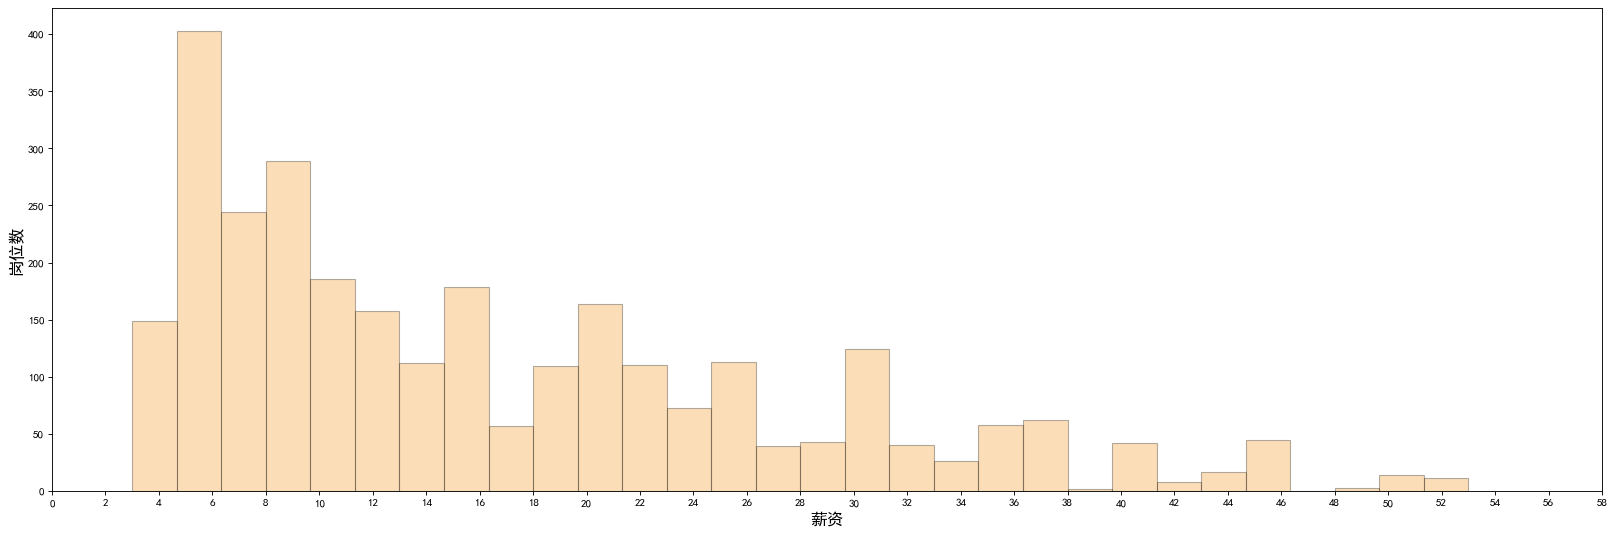

In [115]:
fig=plt.figure(figsize=(25,8),dpi=80)
plt.hist(new_df['平均薪资'],bins=30,color='#f59311',alpha=0.3,edgecolor='k')
plt.ylabel('岗位数',fontsize=15)
plt.xlabel('薪资',fontsize=15)
plt.xticks(list(range(0,60,2)))
plt.show()

* 通过上图可以观察到，从总体来看，这个岗位少部分人拿着极高的工资
* 他们拉高了整个岗位的平均水平
* 月薪八千至两万五的岗位不在少数
* 然而四千至六千的岗位居然是最多的，那么这些岗位主要是分布在哪些地区或行业呢，下面尝试进行分析

### 薪资在四千至六千

In [79]:
薪资_四千至六千= new_df[(new_df['平均薪资']>4) & (new_df['平均薪资']<6)]
薪资_四千至六千

,职位,城市,公司,薪资,最低薪资,最高薪资,奖金率,平均薪资,学历,工作经验,行业标签
424,数据分析专员,广州,健丽美诗沁,4-6K,4,6,1.000000,5,本科,1-3年,医疗健康
426,数据分析师,广州,晟田集团,4-7K,4,7,1.000000,5,大专,1-3年,其他行业
487,数据分析专员,广州,昭龙服饰,5-6K,5,6,1.000000,5,本科,1-3年,其他行业
561,数据分析专员,广州,袋鼠妈妈,4-6K,4,6,1.000000,5,大专,1年以内,电子商务
644,数据分析专员（零售行业）,深圳,百丽,5-6K·13薪,5,6,1.083333,5,大专,1年以内,其他行业
...,...,...,...,...,...,...,...,...,...,...,...
2920,数据分析师,南京,万得,4-6K,4,6,1.000000,5,不限,经验不限,数据服务
2921,助理数据分析员,南京,万得,4-6K,4,6,1.000000,5,本科,经验不限,数据服务
2922,数据分析师（经济）,南京,万得,4-6K,4,6,1.000000,5,本科,经验不限,数据服务
2923,（金融）数据分析员,南京,万得,4-6K,4,6,1.000000,5,本科,经验不限,数据服务


In [80]:
薪资_四千至六千岗位数=pd.DataFrame(薪资_四千至六千.groupby('城市').平均薪资.count())
new_df岗位数=薪资_四千至六千岗位数.reset_index().rename(columns={"平均薪资":"岗位数"})
#岗位数=岗位数.iloc[:,1]
new_df岗位数

,城市,岗位数
0,南京,21
1,厦门,8
2,天津,18
3,广州,4
4,成都,17
5,杭州,1
6,武汉,15
7,深圳,1
8,苏州,19
9,郑州,34


In [81]:
%matplotlib inline
from pylab import *
datas=pd.DataFrame({"岗位数量":new_df岗位数["岗位数"]
                              ,"城市":new_df岗位数["城市"]})
fig=px.pie(datas,values="岗位数量",names="城市",title="薪资_四千至六千岗位数量的城市分布情况",template="seaborn")
fig.update_traces(textposition="inside",textinfo="value+percent+label")#标签位置放在里面，标签信息包含值，百分比，标签
fig.show()


In [82]:
py.offline.plot(fig, filename="薪资_四千至六千岗位数量的城市分布情况.html",auto_open=False)
with open("薪资_四千至六千岗位数量的城市分布情况.html", encoding="utf8", mode="r") as f:
    plot_all1 = "".join(f.readlines())

### 数据分析结果

* 由上可知，岗位人数最多的薪资水平较低，为4-6k。
* 同时薪资水平在4-6k的岗位主要集中分布于郑州、青岛、南京、重庆、苏州、天津、成都、武汉、长沙等中西部城市。
* 东部地区的“数据分析”岗位薪资基本不在4-6k范围。

### 薪资小于八千

* 根据调研得知大多数人找工作会把8k当作薪资的分水岭，以下分别分析薪资小于和大于8k的情况。

In [46]:
薪资小于八千= new_df[(new_df['平均薪资']<8)]
薪资小于八千

,职位,城市,公司,薪资,最低薪资,最高薪资,奖金率,平均薪资,学历,工作经验,行业标签
289,数据分析师,上海,平安好学,6-9K,6,9,1.0,7,本科,1-3年,在线教育
420,数据分析专员,广州,美丽联盟,4-8K,4,8,1.0,6,本科,1-3年,其他行业
422,数据分析师,广州,师大教育,5-7K,5,7,1.0,6,本科,1-3年,在线教育
424,数据分析专员,广州,健丽美诗沁,4-6K,4,6,1.0,5,本科,1-3年,医疗健康
426,数据分析师,广州,晟田集团,4-7K,4,7,1.0,5,大专,1-3年,其他行业
...,...,...,...,...,...,...,...,...,...,...,...
2921,助理数据分析员,南京,万得,4-6K,4,6,1.0,5,本科,经验不限,数据服务
2922,数据分析师（经济）,南京,万得,4-6K,4,6,1.0,5,本科,经验不限,数据服务
2923,（金融）数据分析员,南京,万得,4-6K,4,6,1.0,5,本科,经验不限,数据服务
2924,数据分析员,南京,万得,4-6K,4,6,1.0,5,本科,1年以内,数据服务


In [47]:
薪资小于八千岗位数=pd.DataFrame(薪资小于八千.groupby('城市').平均薪资.count())
new_df岗位数=薪资小于八千岗位数.reset_index().rename(columns={"平均薪资":"岗位数"})
#岗位数=岗位数.iloc[:,1]
new_df岗位数

,城市,岗位数
0,上海,1
1,南京,61
2,厦门,53
3,天津,96
4,广州,35
5,成都,64
6,杭州,12
7,武汉,65
8,深圳,4
9,苏州,56


In [48]:
%matplotlib inline
from pylab import *
datas=pd.DataFrame({"岗位数量":new_df岗位数["岗位数"]
                              ,"城市":new_df岗位数["城市"]})
fig=px.pie(datas,values="岗位数量",names="城市",title="薪资小于八千岗位数量的城市分布情况",template="seaborn")
fig.update_traces(textposition="inside",textinfo="value+percent+label")#标签位置放在里面，标签信息包含值，百分比，标签
fig.show()


In [49]:
py.offline.plot(fig, filename="薪资小于八千岗位数量的城市分布情况.html",auto_open=False)
with open("薪资小于八千岗位数量的城市分布情况.html", encoding="utf8", mode="r") as f:
    plot_all1 = "".join(f.readlines())

### 薪资大于八千

In [50]:
薪资大于八千= new_df[(new_df['平均薪资']>8)]
薪资大于八千

,职位,城市,公司,薪资,最低薪资,最高薪资,奖金率,平均薪资,学历,工作经验,行业标签
0,数据分析,北京,中信百信银行,25-40K·15薪,25,40,1.250000,40,本科,5-10年,银行
1,数据分析,北京,BOSS直聘,25-40K·16薪,25,40,1.333333,43,博士,1-3年,其他行业
3,数据分析,北京,一亩田,15-25K,15,25,1.000000,20,本科,3-5年,O2O
4,数据分析岗,北京,建信金科,20-40K·14薪,20,40,1.166667,35,硕士,5-10年,银行
5,数据分析,北京,北京新氧万维,15-30K·14薪,15,30,1.166667,26,本科,1-3年,互联网
...,...,...,...,...,...,...,...,...,...,...,...
2901,用户数据分析 (MJ002281),南京,SHEIN,10-15K,10,15,1.000000,12,本科,1-3年,电子商务
2906,数据分析师,南京,阿博茨科技,8-13K,8,13,1.000000,10,本科,3-5年,互联网
2907,数据分析师,南京,满帮集团,8-16K,8,16,1.000000,12,本科,1-3年,移动互联网
2908,电商数据分析师 (MJ002279),南京,SHEIN,10-15K,10,15,1.000000,12,本科,3-5年,电子商务


In [51]:
薪资大于八千岗位数=pd.DataFrame(薪资大于八千.groupby('城市').平均薪资.count())
new_df岗位数=薪资大于八千岗位数.reset_index().rename(columns={"平均薪资":"岗位数"})
#岗位数=岗位数.iloc[:,1]
new_df岗位数

,城市,岗位数
0,上海,187
1,北京,191
2,南京,121
3,厦门,123
4,天津,83
5,广州,149
6,成都,108
7,杭州,181
8,武汉,120
9,深圳,188


In [52]:
%matplotlib inline
from pylab import *
datas=pd.DataFrame({"岗位数量":new_df岗位数["岗位数"]
                              ,"城市":new_df岗位数["城市"]})
fig=px.pie(datas,values="岗位数量",names="城市",title="薪资大于八千岗位数量的城市分布情况",template="seaborn")
fig.update_traces(textposition="inside",textinfo="value+percent+label")#标签位置放在里面，标签信息包含值，百分比，标签
fig.show()


In [53]:
py.offline.plot(fig, filename="薪资大于八千岗位数量的城市分布情况.html",auto_open=False)
with open("薪资大于八千岗位数量的城市分布情况.html", encoding="utf8", mode="r") as f:
    plot_all1 = "".join(f.readlines())

### 数据分析结果

* 从以上饼图可以看到，各城市间薪资水平差异非常大。
* 岗位人数最多的薪资阶段为4-6k，而且这些岗位大多分布在中西部城市。
* 薪资水平小于8k的岗位主要集中分布于青岛、天津、郑州、重庆、成都、武汉等中西部城市；
而北上广深杭等城市薪资水平小于8K的特别少。
* 而薪资水平大于8K的岗位分布区别则非常明显，北上广深杭的所占比重直接升至7%以上，青岛、郑州等城市所占比重则减少到3%左右。
* 由此可见，低薪岗位主要分布于中西部城市；高薪岗位主要分布在东部城市，特别是一线城市。

## 选取薪资水平较高的五个城市进行分析

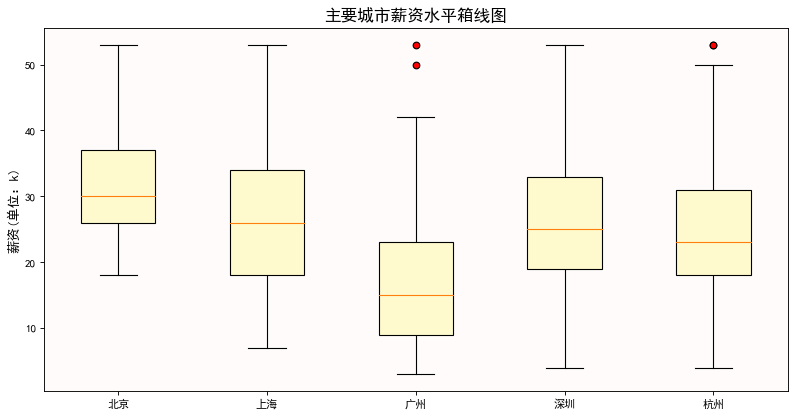

In [54]:
data1=new_df[new_df.城市=='北京']['平均薪资']
data2=new_df[new_df.城市=='上海']['平均薪资']
data3=new_df[new_df.城市=='广州']['平均薪资']
data4=new_df[new_df.城市=='深圳']['平均薪资']
data5=new_df[new_df.城市=='杭州']['平均薪资']
plt.figure(figsize=(12,6),dpi=80)
plt.boxplot([data1,data2,data3,data4,data5],labels=['北京','上海','广州','深圳','杭州'], 
            flierprops={'marker':'o','markerfacecolor':'r','color':'k'},
            patch_artist=True,boxprops={'color':'k','facecolor':'#FFFACD'})
ax=plt.gca()
ax.patch.set_facecolor('#FFFAFA')
ax.patch.set_alpha(0.8)
plt.title('主要城市薪资水平箱线图',fontsize=15)
plt.ylabel('薪资(单位：k)',fontsize=12)
plt.show()

### 数据分析结果

* 可以发现，北京的薪资水平是最高的，无论是最低值还是最高值，而且均分布在较高的水平
* 相对来说，杭州上海深圳两级分化最为严重

## 不同学历的薪资和岗位情况

### 不同学历的薪资情况

In [55]:
xueli=list(new_df.平均薪资.groupby(new_df['学历']).agg(['mean','median']).reset_index().iloc[:,0])
mean=list(new_df.平均薪资.groupby(new_df['学历']).agg(['mean','median']).reset_index().iloc[:,1])
median=list(new_df.平均薪资.groupby(new_df['学历']).agg(['mean','median']).reset_index().iloc[:,2])

In [56]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=xueli, 
    y=mean,             
    name='平均值',
    marker_color='rgb(153,204,153)'
                
))

fig.add_trace(go.Bar(
    x=xueli, 
    y=median,             
    name='中位数',
    marker_color='rgb(204,102,153)',
   
                
))

fig.update_layout(
    title='不同学历的薪资对比图',  # 整个图的标题
    xaxis_tickfont_size=12,   # x轴字体大小
    legend=dict(
#         x=0,  # 图例的位置
#         y=1,
#         bgcolor='rgba(255, 255, 255, 0)',  # 图例的背景色
        bordercolor='rgba(2, 255, 255, 0)'   # 边缘颜色
    ),
    barmode='group',  # 柱状图模式
    bargap=0.4,  # 组间距离
    bargroupgap=0  # 组内距离
    )
fig.show()


In [57]:
py.offline.plot(fig, filename="不同学历薪资对比图.html",auto_open=False)
with open("不同学历薪资对比图.html", encoding="utf8", mode="r") as f:
    plot_all1 = "".join(f.readlines())

### 数据分析结果

* 从学历方面来看，本科是一个分水岭
* 是否是本科，对薪资水平的影响还是很大的
* 而本科与硕士之间并没有特别大的差距
* 博士的薪资水平远远高于其他学历

### 不同学历的岗位情况

In [58]:
new_df

,职位,城市,公司,薪资,最低薪资,最高薪资,奖金率,平均薪资,学历,工作经验,行业标签
0,数据分析,北京,中信百信银行,25-40K·15薪,25,40,1.250000,40,本科,5-10年,银行
1,数据分析,北京,BOSS直聘,25-40K·16薪,25,40,1.333333,43,博士,1-3年,其他行业
3,数据分析,北京,一亩田,15-25K,15,25,1.000000,20,本科,3-5年,O2O
4,数据分析岗,北京,建信金科,20-40K·14薪,20,40,1.166667,35,硕士,5-10年,银行
5,数据分析,北京,北京新氧万维,15-30K·14薪,15,30,1.166667,26,本科,1-3年,互联网
...,...,...,...,...,...,...,...,...,...,...,...
2921,助理数据分析员,南京,万得,4-6K,4,6,1.000000,5,本科,经验不限,数据服务
2922,数据分析师（经济）,南京,万得,4-6K,4,6,1.000000,5,本科,经验不限,数据服务
2923,（金融）数据分析员,南京,万得,4-6K,4,6,1.000000,5,本科,经验不限,数据服务
2924,数据分析员,南京,万得,4-6K,4,6,1.000000,5,本科,1年以内,数据服务


In [59]:
data2=pd.DataFrame(new_df.groupby('学历').职位.count())
不同学历岗位数量=data2.reset_index().rename(columns={"职位":"岗位数"})
#岗位数=岗位数.iloc[:,1]
不同学历岗位数量

,学历,岗位数
0,不限,74
1,中技,10
2,博士,6
3,大专,487
4,本科,2153
5,硕士,142
6,高中,8


In [60]:
datas=pd.DataFrame({"岗位数量":不同学历岗位数量["岗位数"]
                              ,"学历":不同学历岗位数量["学历"]})
fig=px.pie(datas,values="岗位数量",names="学历",title="不同学历岗位数量情况",template="seaborn")
fig.update_traces(textposition="inside",textinfo="value+percent+label")#标签位置放在里面，标签信息包含值，百分比，标签
fig.show()

In [61]:
py.offline.plot(fig, filename="不同学历岗位数量情况.html",auto_open=False)
with open("不同学历岗位数量情况.html", encoding="utf8", mode="r") as f:
    plot_all1 = "".join(f.readlines())

### 数据分析结果

* 从市场需求来看，要求本科占据绝大多数
* 该岗位对学历的门槛并不是很高，要求硕士的较少，而博士则是凤毛麟角
* 不过这也从侧面反映了社会上学历的分布状况，本科生及大专生占绝对多数
* 虽然市场需求量大，但是本科生就业压力也很大

## 不同工作经验的薪资和岗位情况

### 不同工作经验的薪资情况

In [62]:
工作经验=list(new_df.平均薪资.groupby(new_df['工作经验']).agg(['mean','median']).reset_index().iloc[:,0])
mean=list(new_df.平均薪资.groupby(new_df['工作经验']).agg(['mean','median']).reset_index().iloc[:,1])
median=list(new_df.平均薪资.groupby(new_df['工作经验']).agg(['mean','median']).reset_index().iloc[:,2])

In [116]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=工作经验, 
    y=mean,             
    name='平均值',
    marker_color='rgb(153, 102, 153)'
                
))

fig.add_trace(go.Bar(
    x=工作经验, 
    y=median,             
    name='中位数',
    marker_color='rgb(255, 255, 125)',
   
                
))

fig.update_layout(
    title='各工作年限薪资均值及中位数比较图',  # 整个图的标题
    xaxis_tickfont_size=12,   # x轴字体大小
    legend=dict(
#         x=0,  # 图例的位置
#         y=1,
#         bgcolor='rgba(255, 255, 255, 0)',  # 图例的背景色
        bordercolor='rgba(2, 255, 255, 0)'   # 边缘颜色
    ),
    barmode='group',  # 柱状图模式
    bargap=0.4,  # 组间距离
    bargroupgap=0  # 组内距离
    )
fig.show()


In [64]:
py.offline.plot(fig, filename="不同工作经验的薪资情况.html",auto_open=False)
with open("不同工作经验的薪资情况.html", encoding="utf8", mode="r") as f:
    plot_all1 = "".join(f.readlines())

### 数据分析结果

* 应届生的工资还是比较低的，和工作经验一年内的差距并不大
* 但是随着工作年限的增加，迈过3年工作经验这个门槛，工资水平将直线上升
* 说明这个岗位是一个需要累积丰富经验的岗位

### 不同工作经验的岗位情况

In [65]:
new_df_工作经验=new_df[["工作经验","职位"]]
new_df_gzjy=pd.DataFrame(new_df_工作经验.groupby('工作经验').职位.count())
new_df_岗位数=new_df_gzjy.reset_index().rename(columns={"职位":"岗位数"})
#岗位数=岗位数.iloc[:,1]
new_df_gzjy_s=pd.DataFrame({"工作经验":new_df_岗位数["工作经验"]
                              ,"岗位数量":new_df_岗位数["岗位数"]})
工作经验分析=new_df_gzjy_s.sort_values(by=["岗位数量"],ascending=False)
fig=px.bar(工作经验分析,x="工作经验",y="岗位数量",color="工作经验",title="不同工作经验的岗位数量情况",template="seaborn")
#fig.update_traces(textposition="inside",textinfo="value+percent+label")#标签位置放在里面，标签信息包含值，百分比，标签
fig.show()

In [66]:
py.offline.plot(fig, filename="不同工作经验的岗位情况.html",auto_open=False)
with open("不同工作经验的岗位情况.html", encoding="utf8", mode="r") as f:
    plot_all1 = "".join(f.readlines())

### 数据分析结果

* 我们发现，市场上对于工作经验的要求还是很强烈的
* 1-5年的经验要求占绝大多数
* 而应届生和10年以上的需求则非常少
* 工作经验是入职成功与否的关键因素

## 不同行业的薪资和岗位情况

### 不同行业的薪资情况

In [67]:
hangye=list(new_df.平均薪资.groupby(new_df['行业标签']).agg(['mean','median']).reset_index().iloc[:,0])
mean=list(new_df.平均薪资.groupby(new_df['行业标签']).agg(['mean','median']).reset_index().iloc[:,1])
median=list(new_df.平均薪资.groupby(new_df['行业标签']).agg(['mean','median']).reset_index().iloc[:,2])

In [72]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=hangye, 
    y=mean,             
    name='平均值',
    marker_color='#408080'
                
))

fig.add_trace(go.Bar(
    x=hangye, 
    y=median,             
    name='中位数',
    marker_color='#984B4B',
   
                
))

fig.update_layout(
    title='不同行业的薪资对比图',  # 整个图的标题
    xaxis_tickfont_size=14,   # x轴字体大小
    legend=dict(
#         x=0,  # 图例的位置
#         y=1,
#         bgcolor='rgba(255, 255, 255, 0)',  # 图例的背景色
        bordercolor='rgba(2, 255, 255, 0)'   # 边缘颜色
    ),
    barmode='group',  # 柱状图模式
    bargap=0.4,  # 组间距离
    bargroupgap=0  # 组内距离
    )
fig.show()

In [69]:
py.offline.plot(fig, filename="不同行业的薪资情况.html",auto_open=False)
with open("不同行业的薪资情况.html", encoding="utf8", mode="r") as f:
    plot_all1 = "".join(f.readlines())

### 不同行业的岗位情况

In [70]:
new_df_行业=new_df[["行业标签","职位"]]
new_df_hybq=pd.DataFrame(new_df_行业.groupby('行业标签').职位.count())
new_df_岗位数=new_df_hybq.reset_index().rename(columns={"职位":"岗位数"})
#岗位数=岗位数.iloc[:,1]
new_df_hybq_s=pd.DataFrame({"行业":new_df_岗位数["行业标签"]
                              ,"岗位数量":new_df_岗位数["岗位数"]})
工作经验分析=new_df_hybq_s.sort_values(by=["岗位数量"],ascending=False)
fig=px.bar(工作经验分析,x="行业",y="岗位数量",color="行业",title="不同行业的岗位数量情况",template="seaborn")
#fig.update_traces(textposition="inside",textinfo="value+percent+label")#标签位置放在里面，标签信息包含值，百分比，标签
fig.show()

In [71]:
py.offline.plot(fig, filename="不同行业的岗位情况.html",auto_open=False)
with open("不同行业的岗位情况.html", encoding="utf8", mode="r") as f:
    plot_all1 = "".join(f.readlines())

### 数据结果分析

* 通过上图我们可以发现，互联网行业和电子商务对该岗位的需求非常大，同时薪资水平相比于其他行业也高了很多。
* 而其他传统行业相对来说，无论是需求量还是薪资水平，都低一些

# 总结

* 通过以上分析，可以发现，如果要成功进入数据分析行业，应该往北上广深行这几个城市考虑，这些城市的薪资水平高。
* 而行业方面应该着眼于互联网及电子商务等新兴行业，这些行业对该岗位的需求都比较大，而且薪资水平也普遍高
* 工作经验对于该岗位而言非常重要，能否成功进入数据分析行业的关键门槛在于是否有工作经验，与薪资水平呈正相关
* 而成功进入数据分析行业以后，只有在迈过3年这个坎，才会有比较大的突破